In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandasql as ps
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime
import pandasql as ps


## PCA
from sklearn.decomposition import PCA

## K-Means
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Hierachical
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, fcluster

In [2]:
os.chdir("/Users/tonychu/SynologyDrive/Drive Workspace/Dissertation/datasets/")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Please change the directory to where you store the raw datasets
print("List of available files: ")
for dirname, _, filenames in os.walk('nba_game_data'): 
    for filename in filenames:
        print("- ", filename)

List of available files: 
-  teams.csv
-  players.csv
-  games.csv
-  ranking.csv
-  games_details.csv


In [5]:
# Please change the directory to where you store the raw datasets
print("List of available files: ")
for dirname, _, filenames in os.walk('nba_stats'): 
    for filename in filenames:
        print("- ", filename)

List of available files: 
-  Team Stats Per 100 Poss.csv
-  End of Season Teams (Voting).csv
-  Team Totals.csv
-  Player Per Game.csv
-  Advanced.csv
-  .DS_Store
-  End of Season Teams.csv
-  Opponent Stats Per 100 Poss.csv
-  Player Career Info.csv
-  Player Totals.csv
-  Player Play By Play.csv
-  Player Season Info.csv
-  All-Star Selections.csv
-  Team Abbrev.csv
-  Per 36 Minutes.csv
-  Opponent Stats Per Game.csv
-  Team Summaries.csv
-  Player Shooting.csv
-  Team Stats Per Game.csv
-  Per 100 Poss.csv
-  Opponent Totals.csv
-  Player Award Shares.csv


In [6]:
pd.read_csv("nba_game_data/games_details.csv")

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,4.0,10.0,0.400,3.0,8.0,0.375,4.0,4.0,1.000,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,6.0,8.0,0.750,1.0,3.0,0.333,1.0,1.0,1.000,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,4.0,9.0,0.444,1.0,3.0,0.333,6.0,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,4.0,9.0,0.444,4.0,9.0,0.444,0.0,0.0,0.000,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,3.0,13.0,0.231,1.0,6.0,0.167,7.0,7.0,1.000,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [13]:
player_career = pd.read_csv("nba_stats/Player Totals.csv")
player_career = player_career[player_career["season"] > 1989]
player_career_total = player_career.groupby(["player_id","player"])["g","mp","fg","fga","x3p","x3pa","x2p","x2pa","ft","fta","orb","drb","trb","ast","stl","blk","tov","pf","pts"].sum().reset_index()

<ipython-input-13-e58bc39c54b8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_career_total = player_career.groupby(["player_id","player"])["g","mp","fg","fga","x3p","x3pa","x2p","x2pa","ft","fta","orb","drb","trb","ast","stl","blk","tov","pf","pts"].sum().reset_index()


In [14]:
player_career.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0,0,NaN,0.0,0.0,NaN,0,0,NaN,NaN,0,0,NaN,0.0,0.0,0.0,1,0.0,0.0,0.0,0,0
1,30459,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,198.0,40,77,0.519,5.0,23.0,0.217,35,54,0.648,0.552,11,20,0.550,16.0,29.0,45.0,13,1.0,9.0,10.0,10,96
2,30460,2023,4582,Aaron Holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,125.0,14,29,0.483,5.0,8.0,0.625,9,21,0.429,0.569,5,5,1.000,3.0,4.0,7.0,10,6.0,2.0,6.0,9,38
3,30461,2023,4805,Aaron Nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,131.0,19,43,0.442,7.0,22.0,0.318,12,21,0.571,0.523,7,9,0.778,3.0,18.0,21.0,9,1.0,5.0,6.0,18,52
4,30462,2023,4900,Aaron Wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,132.0,13,32,0.406,4.0,12.0,0.333,9,20,0.450,0.469,7,9,0.778,6.0,23.0,29.0,9,4.0,2.0,2.0,6,37


In [15]:
player_career_total[player_career_total['player']== 'Michael Jordan']

,player_id,player,g,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
150,2193,Michael Jordan,727,27569.0,8072,16512,523.0,1491.0,7549,15021,4362,5276,1024.0,3519.0,4543.0,3587,1552.0,482.0,1774.0,1698,21029


In [16]:
player_career_total["fg_percent"] = player_career_total["fg"] / player_career_total["fga"]
player_career_total["x3p_percent"] = player_career_total["x3p"] / player_career_total["x3pa"]
player_career_total["x2p_percent"] = player_career_total["x2p"] / player_career_total["x2pa"]
player_career_total["ft_percent"] = player_career_total["ft"] / player_career_total["fta"]

In [17]:
player_career_total["mpg"] = player_career_total["mp"] / player_career_total["g"]
player_career_total["fgpg"] = player_career_total["fg"] / player_career_total["g"]
player_career_total["fgapg"] = player_career_total["fga"] / player_career_total["g"]
player_career_total["x3ppg"] = player_career_total["x3p"] / player_career_total["g"]
player_career_total["x3papg"] = player_career_total["x3pa"] / player_career_total["g"]
player_career_total["x2papg"] = player_career_total["x2pa"] / player_career_total["g"]
player_career_total["x2papg"] = player_career_total["x2pa"] / player_career_total["g"]
player_career_total["ftpg"] = player_career_total["ft"] / player_career_total["g"]
player_career_total["ftapg"] = player_career_total["fta"] / player_career_total["g"]
player_career_total["ppg"] = player_career_total["pts"] / player_career_total["g"]
player_career_total["trpg"] = player_career_total["trb"] / player_career_total["g"]
player_career_total["orpg"] = player_career_total["orb"] / player_career_total["g"]
player_career_total["drpg"] = player_career_total["drb"] / player_career_total["g"]
player_career_total["apg"] = player_career_total["ast"] / player_career_total["g"]
player_career_total["spg"] = player_career_total["stl"] / player_career_total["g"]
player_career_total["bpg"] = player_career_total["blk"] / player_career_total["g"]
player_career_total["tpg"] = player_career_total["tov"] / player_career_total["g"]
player_career_total["pfpg"] = player_career_total["pf"] / player_career_total["g"]

In [18]:
player_career_avg = player_career_total[['player_id', 'player','mpg', 'fgpg', 'fgapg', 'x3ppg', 'x3papg', 'x2papg', 'ftpg', 'ftapg','ppg', 'fg_percent', 'x3p_percent', 'x2p_percent', 'ft_percent','trpg', 'orpg', 'drpg', 'apg', 'spg', 'bpg', 'tpg', 'pfpg']]

In [19]:
player_career_avg["season"] = player_career.groupby(["player_id","player"])["season"].count().reset_index()["season"]

<ipython-input-19-ed85e5bab779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_career_avg["season"] = player_career.groupby(["player_id","player"])["season"].count().reset_index()["season"]


In [20]:
player_career_avg.sort_values("ppg",ascending=False)

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season
150,2193,Michael Jordan,37.921596,11.103164,22.712517,0.719395,2.050894,20.661623,6.000000,7.257221,28.925722,0.488857,0.350771,0.502563,0.826763,6.248968,1.408528,4.840440,4.933975,2.134801,0.662999,2.440165,2.335626,10
1618,3770,Kevin Durant,36.757928,9.293869,18.733615,1.883721,4.913319,13.820296,6.752643,7.634249,27.224101,0.496107,0.383391,0.536179,0.884520,7.063425,0.700846,6.362579,4.292812,1.086681,1.112051,3.158562,1.921776,15
1311,3463,LeBron James,38.160350,9.913994,19.647959,1.568513,4.542274,15.105685,5.729592,7.802478,27.126093,0.504581,0.345315,0.552473,0.734330,7.480321,1.176385,6.303936,7.353499,1.563411,0.761662,3.508017,1.842566,20
2502,4654,Luka Dončić,33.881481,9.081481,19.807407,2.755556,8.240741,11.566667,5.681481,7.688889,26.600000,0.458489,0.334382,0.546910,0.738921,8.566667,1.044444,7.522222,7.977778,1.066667,0.422222,4.066667,2.244444,5
2265,4417,Joel Embiid,31.278443,8.553892,17.446108,1.182635,3.508982,13.937126,7.751497,9.574850,26.041916,0.490304,0.337031,0.528894,0.809568,11.344311,2.311377,9.032934,3.293413,0.862275,1.643713,3.386228,3.080838,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,4945,Jaime Echenique,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1417,3569,Alex Scales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2528,4680,Tyler Davis,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
487,2639,Cedric Hunter,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [22]:
len(player_career_avg.columns)

24

In [23]:
player_career_avg.describe()

,player_id,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2902.000000,2609.000000,2879.000000,2748.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,3602.068601,16.139163,2.350570,5.332946,0.435462,1.301977,4.030969,1.100565,1.499781,6.237167,0.425385,0.265627,0.459354,0.712749,2.780649,0.797150,1.983499,1.392551,0.515229,0.317598,0.942628,1.579457,6.517406
std,871.046076,8.781869,1.764059,3.719446,0.545283,1.465682,3.027263,1.023545,1.295598,4.754043,0.107705,0.149758,0.113032,0.145881,2.017692,0.669122,1.448049,1.427025,0.372200,0.370794,0.647425,0.779798,5.509408
min,1495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2884.250000,8.973531,1.010444,2.548208,0.002628,0.076272,1.843027,0.432583,0.647266,2.733333,0.393428,0.192308,0.424700,0.647097,1.312892,0.313346,0.944790,0.454545,0.250000,0.078716,0.500000,1.000000,2.000000
50%,3616.500000,15.243344,1.933790,4.385794,0.217103,0.781651,3.222770,0.807443,1.146187,5.016832,0.433248,0.307692,0.467532,0.735294,2.334072,0.613154,1.677859,0.934318,0.452869,0.200000,0.816572,1.576923,5.000000
75%,4348.750000,22.331811,3.214666,7.182569,0.690167,2.043883,5.406397,1.465979,1.999496,8.499837,0.473204,0.354927,0.506288,0.800000,3.736024,1.103643,2.657934,1.867548,0.713356,0.416311,1.236837,2.118950,10.000000
max,5081.000000,43.500000,11.103164,22.712517,3.782713,8.854742,20.661623,7.751497,9.574850,28.925722,1.000000,1.000000,1.000000,1.000000,15.126866,5.255224,9.871642,11.136842,2.481481,3.085681,4.128920,5.000000,28.000000


In [25]:
player_career_avg = player_career_avg.dropna()
player_career_avg_train = player_career_avg.drop(columns = ["player_id","player"])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_scaled=pd.DataFrame(scaler.fit_transform(player_career_avg_train))
stats_scaled.columns=player_career_avg_train.columns

In [27]:
stats_scaled

,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season
0,0.247992,0.083810,0.067529,0.003672,0.007685,0.090292,0.068087,0.073492,0.083067,0.639026,0.200000,0.474820,0.703704,0.211177,0.200858,0.216670,0.024942,0.111940,0.121529,0.161463,0.506944,0.000000
1,0.541654,0.374811,0.377314,0.004030,0.009139,0.423860,0.524682,0.534737,0.428874,0.643574,0.185185,0.471240,0.790753,0.512132,0.639898,0.444115,0.092530,0.202721,0.247010,0.442300,0.381860,0.185185
2,0.576561,0.409384,0.414590,0.004807,0.010110,0.463655,0.511338,0.529238,0.451941,0.642991,0.200000,0.470699,0.778571,0.222362,0.297539,0.182340,0.145300,0.183175,0.041246,0.356686,0.486364,0.037037
3,0.551792,0.542086,0.551420,0.003325,0.004104,0.613849,0.227183,0.208029,0.477475,0.648432,0.333333,0.472538,0.866873,0.224516,0.271667,0.199415,0.186361,0.230639,0.097835,0.295507,0.426101,0.037037
4,0.605944,0.247377,0.262615,0.003525,0.035986,0.288579,0.202972,0.190729,0.244765,0.595635,0.041667,0.454545,0.842857,0.177168,0.121784,0.206653,0.580655,0.435224,0.060494,0.377823,0.596667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,0.409639,0.090064,0.292628,0.264361,0.451649,0.142231,0.258015,0.204728,0.172857,0.196204,0.250000,0.000000,1.000000,0.132215,0.190287,0.101300,0.179584,0.000000,0.000000,0.000000,0.250000,0.000000
2504,0.307229,0.180129,0.191334,0.000000,0.169269,0.154373,0.129007,0.178480,0.172857,0.578286,0.000000,0.615385,0.571429,0.132215,0.190287,0.101300,0.022448,0.000000,0.000000,0.000000,0.312500,0.000000
2505,0.750430,0.681916,0.755687,0.339892,0.500056,0.620961,0.810903,0.894652,0.785263,0.601585,0.290323,0.488889,0.733333,0.500529,0.217471,0.651216,0.346341,0.230277,0.370374,0.622785,0.607143,0.000000
2506,0.397590,0.330236,0.307634,0.264361,0.263396,0.239365,0.129007,0.152233,0.322666,0.686715,0.428571,0.533333,0.666667,0.198323,0.253716,0.168834,0.059861,0.134328,0.054013,0.201828,0.666667,0.000000


In [28]:
n_components=player_career_avg_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled)

PCA(n_components=22, random_state=123)

In [29]:
pca.explained_variance_ratio_

array([5.66140940e-01, 1.51727984e-01, 5.85827800e-02, 5.04005451e-02,
       3.20813528e-02, 2.81682524e-02, 2.51819447e-02, 2.14473043e-02,
       1.72332101e-02, 1.27024088e-02, 1.07017876e-02, 1.00954982e-02,
       5.20632592e-03, 3.95670062e-03, 3.18244046e-03, 2.21612181e-03,
       4.88709454e-04, 2.68022532e-04, 2.17670673e-04, 2.19772526e-32,
       1.03457344e-32, 3.31323224e-33])

In [31]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.566141,0.566141
1,2,0.151728,0.717869
2,3,0.058583,0.776452
3,4,0.050401,0.826852
4,5,0.032081,0.858934
5,6,0.028168,0.887102
6,7,0.025182,0.912284
7,8,0.021447,0.933731
8,9,0.017233,0.950964
9,10,0.012702,0.963667


In [32]:
pca_predictor.to_csv('/Users/tonychu/Desktop/pca.csv', index=False)

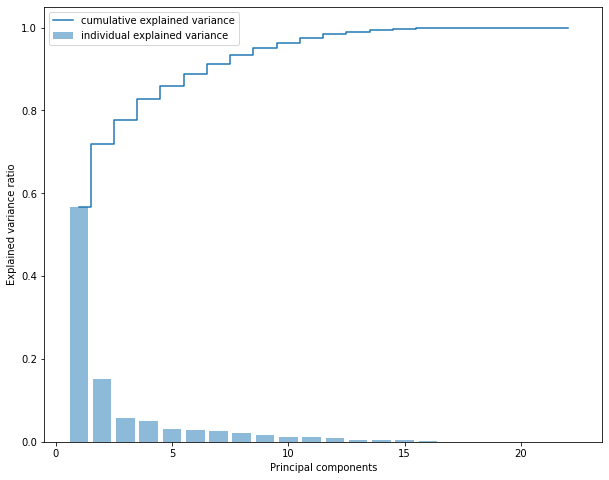

In [33]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')

In [36]:
#why keep 4 =https://365datascience.com/tutorials/python-tutorials/pca-k-means/
pca = PCA(n_components=4)
pca.fit(stats_scaled)

PCA(n_components=4)

In [37]:
# # Print the features that contribute the most to each principal component
# top_features = 10
# for i in range(pca.components_.shape[0]):
#     most_important = np.argsort(pca.components_[i])[-top_features:]
#     print(f"The top {top_features} features that contribute the most to principal component {i} are:")
#     print([stats_scaled.columns[i] for i in most_important])

In [38]:
# Print the features that contribute the most to each principal component
top_features = 5
for i in range(pca.components_.shape[0]):
    most_important = np.argsort(pca.components_[i])[-top_features:]
    print(f"The top {top_features} features that contribute the most to principal component {i} are:")
    print([stats_scaled.columns[i] for i in most_important])

The top 5 features that contribute the most to principal component 0 are:
['pfpg', 'fgpg', 'fgapg', 'ppg', 'mpg']
The top 5 features that contribute the most to principal component 1 are:
['apg', 'ft_percent', 'x3p_percent', 'x3ppg', 'x3papg']
The top 5 features that contribute the most to principal component 2 are:
['fgapg', 'tpg', 'ftpg', 'x2papg', 'ftapg']
The top 5 features that contribute the most to principal component 3 are:
['trpg', 'bpg', 'drpg', 'x3ppg', 'x3papg']


In [39]:
stats_transformed = pca.fit_transform(stats_scaled)
stats_transformed.shape

(2508, 4)

In [40]:
stats_transformed

array([[-0.39926768, -0.24755413,  0.08886128,  0.13052883],
       [ 0.5790034 , -0.4608737 ,  0.3377775 , -0.00441057],
       [ 0.41638869, -0.15613832,  0.4748406 , -0.17101274],
       ...,
       [ 1.38870127,  0.08302855,  0.69684494,  0.19338726],
       [ 0.07923249,  0.06281941,  0.1262078 ,  0.32367424],
       [ 0.05004943, -0.01456725,  0.10160078,  0.28488733]])

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


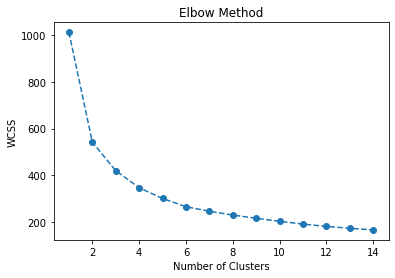

In [41]:
# Create an empty list to store the inertia values for each number of clusters
wcss = []

# Define the range of possible number of clusters
num_clusters = range(1, 15)

# Fit the KMeans model to the data for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stats_transformed)
    wcss.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(num_clusters, wcss, linestyle='--', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


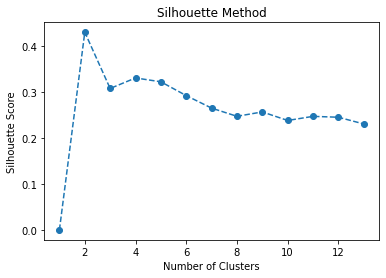

In [42]:
scores = []
range_n_clusters = list(range(1, 14))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(stats_transformed)
    labels = kmeans.labels_
    if n_clusters > 1:
        score = silhouette_score(stats_transformed, labels)
    else:
        score = 0
    scores.append(score)

plt.plot(range_n_clusters, scores, linestyle='--', marker='o')
plt.title('Silhouette Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [110]:
# # We run k-means with number of clusters equal to 4 and fit the data with the pca model
# n_clusters = 6
# kmeans = KMeans(n_clusters=n_clusters, random_state=123)
# kmeans.fit(stats_transformed)

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=123)

In [57]:
#We run k-means with number of clusters equal to 4 and fit the data with the pca model
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

In [58]:
df_seg_pca_kmeans = pd.concat([player_career_avg.reset_index(drop=True), pd.DataFrame(stats_transformed)], axis=1)
df_seg_pca_kmeans.columns.values[-4:] = ['Component 1','Component 2','Component 3','Component 4']

df_seg_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

In [59]:
df_seg_pca_kmeans.head()

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1495,Caldwell Jones,12.291667,0.930556,2.000000,0.013889,0.069444,1.930556,0.527778,0.750000,2.402778,0.465278,0.200000,0.474820,0.703704,3.194444,1.055556,2.138889,0.277778,0.277778,0.375000,0.666667,2.027778,1,0,-0.399268,-0.247554,0.088861,0.130529,3
1,1605,Moses Malone,24.478659,4.161585,8.881098,0.015244,0.082317,8.798780,4.067073,5.143293,12.405488,0.468589,0.185185,0.471240,0.790753,7.746951,3.362805,4.384146,1.030488,0.503049,0.762195,1.826220,1.527439,6,1,0.579003,-0.460874,0.337778,-0.004411,2
2,1692,Adrian Dantley,25.927273,4.545455,9.709091,0.018182,0.090909,9.618182,3.963636,5.090909,13.072727,0.468165,0.200000,0.470699,0.778571,3.363636,1.563636,1.800000,1.618182,0.454545,0.127273,1.472727,1.945455,2,1,0.416389,-0.156138,0.474841,-0.171013,2
3,1693,Alex English,24.899371,6.018868,12.748428,0.012579,0.037736,12.710692,1.761006,2.031447,13.811321,0.472126,0.333333,0.472538,0.866873,3.396226,1.427673,1.968553,2.075472,0.572327,0.301887,1.220126,1.704403,2,1,0.400951,-0.057669,0.399870,-0.092468,2
4,1701,Dennis Johnson,27.146667,2.746667,6.333333,0.013333,0.320000,6.013333,1.573333,1.866667,7.080000,0.433684,0.041667,0.454545,0.842857,2.680000,0.640000,2.040000,6.466667,1.080000,0.186667,1.560000,2.386667,1,1,0.204444,-0.032726,0.336822,-0.270131,0


In [60]:
cluster_labels = kmeans.labels_ #kmeans.labels_
player_career_avg['cluster'] = kmeans.labels_

In [61]:
player_career_avg

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster
0,1495,Caldwell Jones,12.291667,0.930556,2.000000,0.013889,0.069444,1.930556,0.527778,0.750000,2.402778,0.465278,0.200000,0.474820,0.703704,3.194444,1.055556,2.138889,0.277778,0.277778,0.375000,0.666667,2.027778,1,3
1,1605,Moses Malone,24.478659,4.161585,8.881098,0.015244,0.082317,8.798780,4.067073,5.143293,12.405488,0.468589,0.185185,0.471240,0.790753,7.746951,3.362805,4.384146,1.030488,0.503049,0.762195,1.826220,1.527439,6,2
2,1692,Adrian Dantley,25.927273,4.545455,9.709091,0.018182,0.090909,9.618182,3.963636,5.090909,13.072727,0.468165,0.200000,0.470699,0.778571,3.363636,1.563636,1.800000,1.618182,0.454545,0.127273,1.472727,1.945455,2,2
3,1693,Alex English,24.899371,6.018868,12.748428,0.012579,0.037736,12.710692,1.761006,2.031447,13.811321,0.472126,0.333333,0.472538,0.866873,3.396226,1.427673,1.968553,2.075472,0.572327,0.301887,1.220126,1.704403,2,2
4,1701,Dennis Johnson,27.146667,2.746667,6.333333,0.013333,0.320000,6.013333,1.573333,1.866667,7.080000,0.433684,0.041667,0.454545,0.842857,2.680000,0.640000,2.040000,6.466667,1.080000,0.186667,1.560000,2.386667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,5059,Malaki Branham,19.000000,1.000000,7.000000,1.000000,4.000000,3.000000,2.000000,2.000000,5.000000,0.142857,0.250000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1,3
2913,5065,Ochai Agbaji,14.750000,2.000000,4.750000,0.000000,1.500000,3.250000,1.000000,1.750000,5.000000,0.421053,0.000000,0.615385,0.571429,2.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,1.250000,1,3
2915,5067,Paolo Banchero,33.142857,7.571429,17.285714,1.285714,4.428571,12.857143,6.285714,8.571429,22.714286,0.438017,0.290323,0.488889,0.733333,7.571429,1.142857,6.428571,3.857143,0.571429,1.142857,2.571429,2.428571,1,1
2921,5073,Shaedon Sharpe,18.500000,3.666667,7.333333,1.000000,2.333333,5.000000,1.000000,1.500000,9.333333,0.500000,0.428571,0.533333,0.666667,3.000000,1.333333,1.666667,0.666667,0.333333,0.166667,0.833333,2.666667,1,0


/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


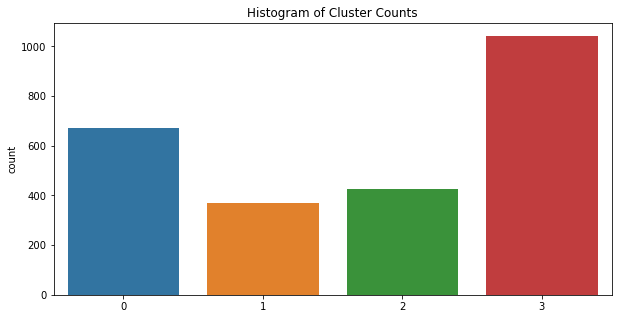

In [62]:
ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [63]:
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = player_career_avg[player_career_avg['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [64]:
columns = player_career_avg_train.columns
cluster_stats(columns)

,cluster,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season
0,0,20.72,2.87,6.73,0.87,2.46,4.27,1.16,1.50,7.78,0.43,0.34,0.47,0.77,2.66,0.59,2.07,2.01,0.70,0.24,1.09,1.77,8.67
1,1,30.97,5.77,12.61,1.06,3.00,9.61,3.03,3.87,15.64,0.46,0.33,0.49,0.79,5.15,1.25,3.90,3.64,1.06,0.55,2.12,2.39,12.22
2,2,20.26,2.94,5.97,0.08,0.29,5.68,1.41,2.06,7.38,0.49,0.16,0.51,0.67,5.14,1.75,3.39,1.01,0.55,0.73,1.11,2.36,10.19
3,3,10.01,1.20,3.00,0.23,0.79,2.21,0.56,0.81,3.19,0.40,0.24,0.43,0.69,1.58,0.49,1.10,0.79,0.32,0.17,0.58,1.10,3.46


In [65]:
cluster_stats(columns).to_csv('/Users/tonychu/Desktop/cluster.csv', index=False)

In [66]:
df_seg_pca_kmeans[df_seg_pca_kmeans["Segment K-means PCA"] == 1].sort_values("ppg", ascending=False)

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
134,2193,Michael Jordan,37.921596,11.103164,22.712517,0.719395,2.050894,20.661623,6.000000,7.257221,28.925722,0.488857,0.350771,0.502563,0.826763,6.248968,1.408528,4.840440,4.933975,2.134801,0.662999,2.440165,2.335626,10,1,1.820846,0.098443,0.601982,-0.333835,1
1402,3770,Kevin Durant,36.757928,9.293869,18.733615,1.883721,4.913319,13.820296,6.752643,7.634249,27.224101,0.496107,0.383391,0.536179,0.884520,7.063425,0.700846,6.362579,4.292812,1.086681,1.112051,3.158562,1.921776,15,1,1.747841,0.306200,0.292747,-0.037725,1
1146,3463,LeBron James,38.160350,9.913994,19.647959,1.568513,4.542274,15.105685,5.729592,7.802478,27.126093,0.504581,0.345315,0.552473,0.734330,7.480321,1.176385,6.303936,7.353499,1.563411,0.761662,3.508017,1.842566,20,1,1.901719,0.264100,0.204998,-0.280402,1
2177,4654,Luka Dončić,33.881481,9.081481,19.807407,2.755556,8.240741,11.566667,5.681481,7.688889,26.600000,0.458489,0.334382,0.546910,0.738921,8.566667,1.044444,7.522222,7.977778,1.066667,0.422222,4.066667,2.244444,5,1,1.812047,0.620498,0.567990,0.231783,1
1968,4417,Joel Embiid,31.278443,8.553892,17.446108,1.182635,3.508982,13.937126,7.751497,9.574850,26.041916,0.490304,0.337031,0.528894,0.809568,11.344311,2.311377,9.032934,3.293413,0.862275,1.643713,3.386228,3.080838,7,1,1.827174,-0.250217,0.607133,0.214113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,3563,Trevor Ariza,28.783784,3.553303,8.427928,1.376126,3.936186,4.491742,1.528529,2.094595,10.011261,0.421611,0.349609,0.484707,0.729749,4.728979,0.955706,3.773273,2.122372,1.408408,0.310060,1.291291,1.945195,26,1,0.628177,0.180081,-0.616661,-0.078895,1
1046,3351,Speedy Claxton,26.297980,3.492424,8.494949,0.133838,0.704545,7.790404,2.497475,3.300505,9.616162,0.411118,0.189964,0.431118,0.756695,2.560606,0.583333,1.977273,4.583333,1.545455,0.121212,1.765152,2.553030,9,1,0.464560,0.003557,0.150861,-0.382210,1
1345,3704,Rajon Rondo,28.904418,3.899008,8.613165,0.489630,1.485122,7.128043,1.065825,1.755636,9.353472,0.452680,0.329690,0.478305,0.607088,4.454463,0.916141,3.538323,7.656447,1.511271,0.128043,2.653742,2.036970,22,1,0.694070,0.055554,-0.311215,-0.453653,1
230,2373,Mark Jackson,29.867636,3.373374,7.616679,0.579189,1.707728,5.908952,1.548585,1.989288,8.874522,0.442893,0.339158,0.472873,0.778462,3.768936,0.925019,2.843917,7.990054,1.105585,0.094109,2.387146,1.624331,19,1,0.566431,0.163869,-0.232763,-0.428616,1


In [67]:
df_seg_pca_kmeans[df_seg_pca_kmeans["player"] == 'Stephen Curry']

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
1523,3903,Stephen Curry,34.336134,8.338535,17.612245,3.782713,8.854742,8.757503,3.887155,4.278511,24.346939,0.473451,0.427196,0.520219,0.90853,4.663866,0.667467,3.996399,6.515006,1.653061,0.22569,3.138055,2.393758,14,1,1.555473,0.969434,0.009382,0.194492,1


<function matplotlib.pyplot.show(close=None, block=None)>

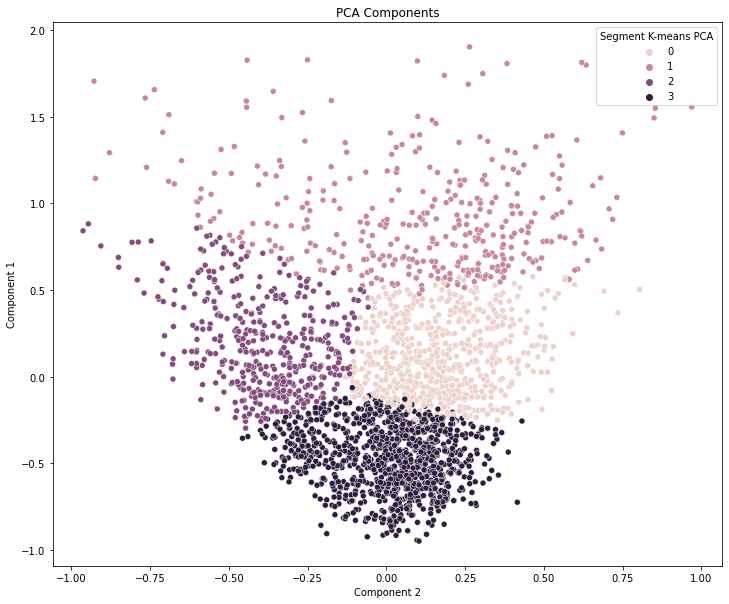

In [70]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (12,10))
sns.scatterplot(x = x, y = y, hue = df_seg_pca_kmeans['Segment K-means PCA'])
plt.title("PCA Components")
plt.show

/Users/tonychu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

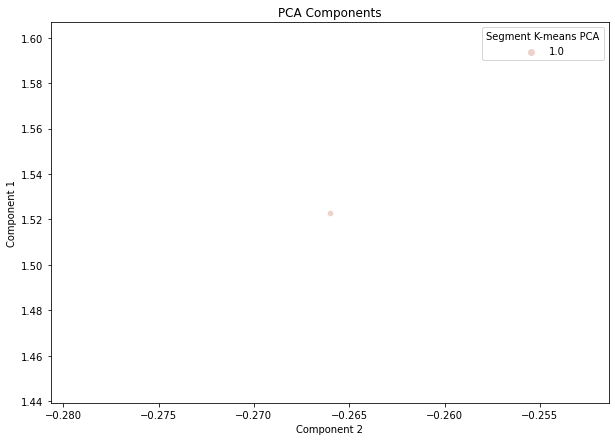

In [136]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (10,7))
sns.scatterplot(x, y, hue = df_seg_pca_kmeans[df_seg_pca_kmeans["player"] == "Giannis Antetokounmpo"]['Segment K-means PCA'])
plt.title("PCA Components")
plt.show

### Recap ###
- The top 5 features that contribute the most to principal component 1 are:
['x2papg', 'fgpg', 'ppg', 'fgapg', 'mpg']
- The top 5 features that contribute the most to principal component 2 are:
['pfpg', 'drpg', 'trpg', 'bpg', 'orpg']
- The top 5 features that contribute the most to principal component 3 are:
['x3papg', 'bpg', 'x3ppg', 'x3p_percent', 'season']
- The top 5 features that contribute the most to principal component 4 are:
['trpg', 'x3ppg', 'x3papg', 'bpg', 'drpg']

### Conclusion 3 ###
- PCA: 8 components
- 14 seems to have the lowest inertia value, thus its the optimal number of clusters

### Hierarchical ###



In [91]:
linkage_matrix_complete = linkage(stats_transformed, method='complete')
linkage_matrix_ward = linkage(stats_transformed, method='ward')
linkage_matrix_average = linkage(stats_transformed, method='average')

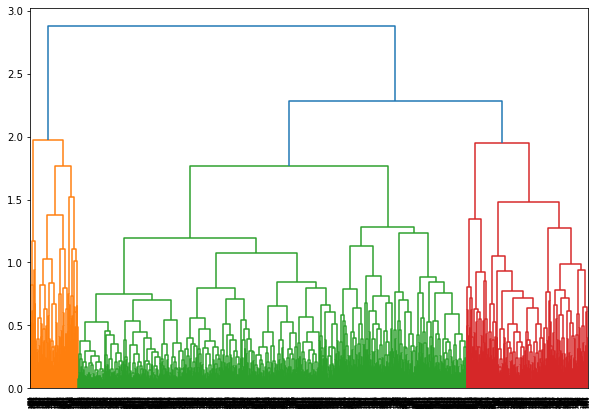

In [78]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_complete)
plt.title('Complete Linkage')
plt.show()

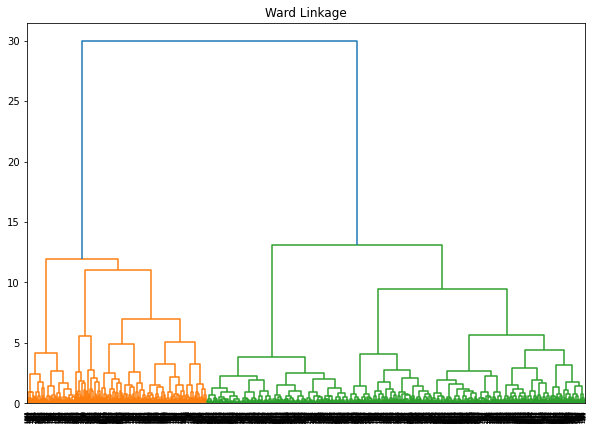

In [81]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_ward)
plt.title('Ward Linkage')
plt.show()

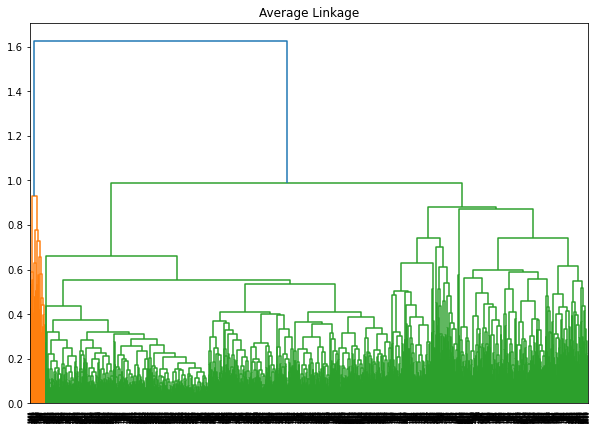

In [135]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_average)
plt.title('Average Linkage')
plt.show()

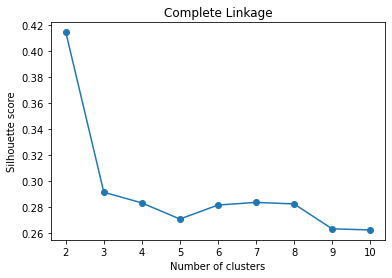

In [82]:
# Define the range of possible number of clusters
n_clusters_range = range(2, 11)

# Create an empty list to store the silhouette scores
scores = []

# Iterate over the range of possible number of clusters
for n_clusters in n_clusters_range:
    # Obtain the flat clusters
    clusters = fcluster(linkage_matrix_complete, t=n_clusters, criterion='maxclust')
    # Compute the silhouette score
    #score = silhouette_score(player_career_avg_train, clusters)
    score = silhouette_score(stats_transformed, clusters)
    # Append the silhouette score to the list of scores
    scores.append(score)

# Plot the silhouette scores
plt.plot(n_clusters_range, scores, marker='o')
plt.title('Complete Linkage')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

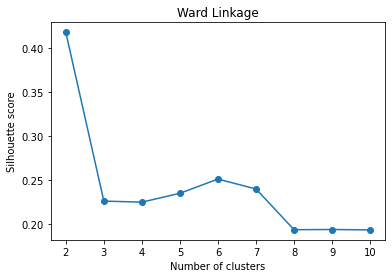

In [84]:
# Define the range of possible number of clusters
n_clusters_range = range(2, 11)

# Create an empty list to store the silhouette scores
scores = []

# Iterate over the range of possible number of clusters
for n_clusters in n_clusters_range:
    # Obtain the flat clusters
    clusters = fcluster(linkage_matrix_ward, t=n_clusters, criterion='maxclust')
    # Compute the silhouette score
    #score = silhouette_score(player_career_avg_train, clusters)
    score = silhouette_score(stats_transformed, clusters)
    # Append the silhouette score to the list of scores
    scores.append(score)

# Plot the silhouette scores
plt.plot(n_clusters_range, scores, marker='o')
plt.title('Ward Linkage')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

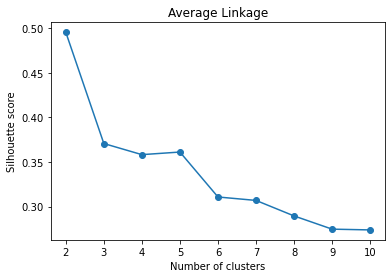

In [92]:
# Define the range of possible number of clusters
n_clusters_range = range(2, 11)

# Create an empty list to store the silhouette scores
scores = []

# Iterate over the range of possible number of clusters
for n_clusters in n_clusters_range:
    # Obtain the flat clusters
    clusters = fcluster(linkage_matrix_average, t=n_clusters, criterion='maxclust')
    # Compute the silhouette score
    #score = silhouette_score(player_career_avg_train, clusters)
    score = silhouette_score(stats_transformed, clusters)
    # Append the silhouette score to the list of scores
    scores.append(score)

# Plot the silhouette scores
plt.plot(n_clusters_range, scores, marker='o')
plt.title('Average Linkage')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

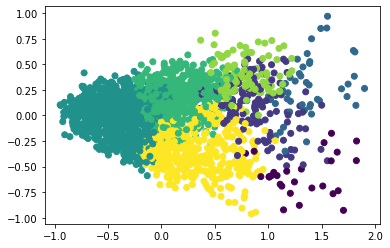

In [93]:
clusters = fcluster(linkage_matrix_complete, t=7, criterion='maxclust')

# Plot the data points colored by the cluster they belong to
plt.scatter(stats_transformed[:,0], stats_transformed[:,1], c=clusters)
plt.show()

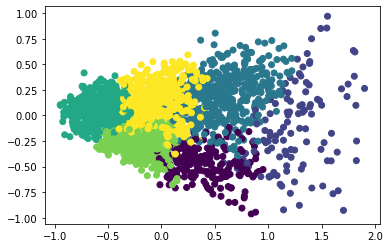

In [86]:
clusters = fcluster(linkage_matrix_ward, t=6, criterion='maxclust')

# Plot the data points colored by the cluster they belong to
plt.scatter(stats_transformed[:,0], stats_transformed[:,1], c=clusters)
plt.show()

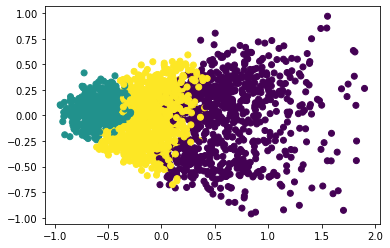

In [142]:
clusters = fcluster(linkage_matrix_ward, t=3, criterion='maxclust')

# Plot the data points colored by the cluster they belong to
plt.scatter(stats_transformed[:,0], stats_transformed[:,1], c=clusters)
plt.show()

In [96]:
player_hierarchical = player_career_avg

In [136]:
from scipy.cluster.hierarchy import cut_tree

# Create the clusters based on the no. of clusters
cluster_labels = cut_tree(linkage_matrix_average, n_clusters=3).reshape(-1, )

# Assign the label to the output column in the original players
player_hierarchical["cluster_hier"] = cluster_labels 

In [137]:
player_hierarchical

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,cluster_hier
0,1495,Caldwell Jones,12.291667,0.930556,2.000000,0.013889,0.069444,1.930556,0.527778,0.750000,2.402778,0.465278,0.200000,0.474820,0.703704,3.194444,1.055556,2.138889,0.277778,0.277778,0.375000,0.666667,2.027778,1,3,0
1,1605,Moses Malone,24.478659,4.161585,8.881098,0.015244,0.082317,8.798780,4.067073,5.143293,12.405488,0.468589,0.185185,0.471240,0.790753,7.746951,3.362805,4.384146,1.030488,0.503049,0.762195,1.826220,1.527439,6,2,1
2,1692,Adrian Dantley,25.927273,4.545455,9.709091,0.018182,0.090909,9.618182,3.963636,5.090909,13.072727,0.468165,0.200000,0.470699,0.778571,3.363636,1.563636,1.800000,1.618182,0.454545,0.127273,1.472727,1.945455,2,2,1
3,1693,Alex English,24.899371,6.018868,12.748428,0.012579,0.037736,12.710692,1.761006,2.031447,13.811321,0.472126,0.333333,0.472538,0.866873,3.396226,1.427673,1.968553,2.075472,0.572327,0.301887,1.220126,1.704403,2,2,1
4,1701,Dennis Johnson,27.146667,2.746667,6.333333,0.013333,0.320000,6.013333,1.573333,1.866667,7.080000,0.433684,0.041667,0.454545,0.842857,2.680000,0.640000,2.040000,6.466667,1.080000,0.186667,1.560000,2.386667,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,5059,Malaki Branham,19.000000,1.000000,7.000000,1.000000,4.000000,3.000000,2.000000,2.000000,5.000000,0.142857,0.250000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1,3,0
2913,5065,Ochai Agbaji,14.750000,2.000000,4.750000,0.000000,1.500000,3.250000,1.000000,1.750000,5.000000,0.421053,0.000000,0.615385,0.571429,2.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,1.250000,1,3,0
2915,5067,Paolo Banchero,33.142857,7.571429,17.285714,1.285714,4.428571,12.857143,6.285714,8.571429,22.714286,0.438017,0.290323,0.488889,0.733333,7.571429,1.142857,6.428571,3.857143,0.571429,1.142857,2.571429,2.428571,1,1,2
2921,5073,Shaedon Sharpe,18.500000,3.666667,7.333333,1.000000,2.333333,5.000000,1.000000,1.500000,9.333333,0.500000,0.428571,0.533333,0.666667,3.000000,1.333333,1.666667,0.666667,0.333333,0.166667,0.833333,2.666667,1,0,1


In [138]:
player_hierarchical[player_hierarchical["cluster_hier"] == 1]

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,cluster_hier
1,1605,Moses Malone,24.478659,4.161585,8.881098,0.015244,0.082317,8.798780,4.067073,5.143293,12.405488,0.468589,0.185185,0.471240,0.790753,7.746951,3.362805,4.384146,1.030488,0.503049,0.762195,1.826220,1.527439,6,2,1
2,1692,Adrian Dantley,25.927273,4.545455,9.709091,0.018182,0.090909,9.618182,3.963636,5.090909,13.072727,0.468165,0.200000,0.470699,0.778571,3.363636,1.563636,1.800000,1.618182,0.454545,0.127273,1.472727,1.945455,2,2,1
3,1693,Alex English,24.899371,6.018868,12.748428,0.012579,0.037736,12.710692,1.761006,2.031447,13.811321,0.472126,0.333333,0.472538,0.866873,3.396226,1.427673,1.968553,2.075472,0.572327,0.301887,1.220126,1.704403,2,2,1
4,1701,Dennis Johnson,27.146667,2.746667,6.333333,0.013333,0.320000,6.013333,1.573333,1.866667,7.080000,0.433684,0.041667,0.454545,0.842857,2.680000,0.640000,2.040000,6.466667,1.080000,0.186667,1.560000,2.386667,1,0,1
5,1705,John Lucas,19.142857,2.224490,5.938776,0.530612,1.775510,4.163265,0.857143,1.122449,5.836735,0.374570,0.298851,0.406863,0.763636,1.836735,0.387755,1.448980,4.857143,0.918367,0.040816,1.734694,1.204082,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,5050,Jalen Williams,16.500000,3.500000,5.000000,0.500000,1.500000,3.500000,1.500000,1.500000,9.000000,0.700000,0.333333,0.857143,1.000000,1.500000,0.000000,1.500000,2.000000,2.000000,0.500000,2.500000,3.000000,1,0,1
2901,5053,Jeremy Sochan,23.500000,3.500000,7.500000,0.666667,2.833333,4.666667,0.333333,0.833333,8.000000,0.466667,0.235294,0.607143,0.400000,4.333333,1.000000,3.333333,2.000000,0.833333,0.500000,1.166667,2.833333,1,0,1
2903,5055,Keegan Murray,35.600000,6.600000,13.400000,3.000000,7.600000,5.800000,1.200000,1.400000,17.400000,0.492537,0.394737,0.620690,0.857143,4.000000,1.200000,2.800000,1.400000,0.400000,1.000000,2.400000,2.200000,1,1,1
2921,5073,Shaedon Sharpe,18.500000,3.666667,7.333333,1.000000,2.333333,5.000000,1.000000,1.500000,9.333333,0.500000,0.428571,0.533333,0.666667,3.000000,1.333333,1.666667,0.666667,0.333333,0.166667,0.833333,2.666667,1,0,1


In [139]:
def cluster_stats_hierarchy(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(3)]})
    for column in columns:
        lst = []
        for i in range(3):
            mean = player_hierarchical[player_hierarchical['cluster_hier'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [140]:
columns = player_career_avg_train.columns
cluster_stats_hierarchy(columns)

,cluster,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season
0,0,12.51,1.57,3.76,0.32,1.02,2.74,0.70,0.99,4.16,0.41,0.25,0.45,0.71,2.01,0.60,1.41,0.98,0.40,0.22,0.69,1.32,4.85
1,1,25.55,4.07,8.91,0.75,2.13,6.78,1.90,2.51,10.78,0.46,0.29,0.49,0.75,4.47,1.23,3.25,2.37,0.82,0.52,1.50,2.25,11.24
2,2,34.59,7.69,16.42,1.22,3.49,12.93,4.68,5.94,21.28,0.47,0.32,0.50,0.79,6.49,1.46,5.03,4.96,1.29,0.71,2.85,2.52,11.54


In [141]:
cluster_stats_hierarchy(columns).to_csv('/Users/tonychu/Desktop/hierarchical_cluster.csv', index=False)

In [133]:
player_hierarchical[player_hierarchical['cluster_hier'] == 2].sort_values("ppg",ascending=False)

,player_id,player,mpg,fgpg,fgapg,x3ppg,x3papg,x2papg,ftpg,ftapg,ppg,fg_percent,x3p_percent,x2p_percent,ft_percent,trpg,orpg,drpg,apg,spg,bpg,tpg,pfpg,season,cluster,cluster_hier
2876,5028,Bennedict Mathurin,27.000000,6.500000,14.250000,2.625000,6.125000,8.125000,4.750000,5.500000,20.375000,0.456140,0.428571,0.476923,0.863636,4.250000,1.500000,2.750000,2.125000,0.500000,0.000000,2.125000,2.500000,1,1,2
2147,4299,Zach LaVine,31.842324,7.078838,15.369295,2.165975,5.603734,9.765560,3.502075,4.219917,19.825726,0.460583,0.386524,0.503081,0.829892,3.919087,0.458506,3.460581,3.887967,0.885892,0.302905,2.657676,2.170124,9,1,2
2447,4599,Collin Sexton,32.460177,7.331858,16.000000,1.477876,3.911504,12.088496,3.575221,4.318584,19.716814,0.458241,0.377828,0.484261,0.827869,3.030973,0.876106,2.154867,3.243363,0.827434,0.106195,2.446903,2.340708,5,1,2
2002,4154,CJ McCollum,31.875380,7.509119,16.484802,2.373860,6.021277,10.463526,2.112462,2.647416,19.504559,0.455518,0.394245,0.490777,0.797933,3.542553,0.650456,2.892097,3.650456,0.917933,0.373860,1.768997,2.107903,12,1,2
1884,4036,Klay Thompson,32.819296,7.327718,16.041348,2.949464,7.099541,8.941807,1.875957,2.208270,19.480858,0.456802,0.415444,0.489639,0.849515,3.477795,0.442573,3.035222,2.326187,0.885145,0.535988,1.690658,2.107198,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3037,Anthony Johnson,18.816956,2.043353,4.956647,0.387283,1.074181,3.882466,0.784200,1.052023,5.258189,0.412245,0.360538,0.426551,0.745421,1.629094,0.354528,1.274566,2.781310,0.666667,0.109827,1.052023,1.582852,21,0,2
2142,4294,Tim Frazier,17.526066,1.805687,4.459716,0.462085,1.393365,3.066351,0.853081,1.196682,4.926540,0.404888,0.331633,0.438176,0.712871,2.319905,0.514218,1.805687,3.900474,0.632701,0.080569,1.327014,1.789100,16,0,2
1020,3172,Anthony Carter,19.278963,1.943598,4.800305,0.195122,0.768293,4.032012,0.672256,0.946646,4.754573,0.404890,0.253968,0.433648,0.710145,2.062500,0.382622,1.679878,3.707317,0.957317,0.184451,1.519817,1.756098,15,0,2
924,3076,Kevin Ollie,16.358209,1.383795,3.366738,0.013859,0.043710,3.323028,1.316631,1.681237,4.098081,0.411020,0.317073,0.412255,0.783133,1.625800,0.235608,1.390192,2.448827,0.545842,0.036247,0.816631,1.226013,23,0,2
